In [ ]:
import pandas as pd
!pip install fsspec
!pip install gcsfs 
 
 
df = pd.read_csv('gs://capstoragebucket2020/All_joined_v3.csv')

In [ ]:
df.head()

,latitude,longitude,month,year,INCENDIE_count,ALARMES_INCENDIES_count,total_crimes,vols_count,Mefait_count,Vol_de_vehicule_count,Introduction_count,Vol_moteur_count,Infractions_entrainant_count,caserne_count,sum_etage_hors_sol,sum_nombre_logement,min_annee_construction,max_annee_construction,avg_annee_construction,sum_superficie_terrain,sum_superficie_batiment,area,population,dwellings,households,averagehouseholdsize,averageage,averagesizeofcensusfamilies,workers
0,45.5,-73.75,1,2016,0,1,1,0,0,0,0,1,0,0,64,1,1959,2010,1981.980392,449902,132825,9.51679,1049,362,354,2.9,34.1,3.2,265
1,45.5,-73.75,10,2016,0,1,0,0,0,0,0,0,0,0,64,1,1959,2010,1981.980392,449902,132825,9.51679,1049,362,354,2.9,34.1,3.2,265
2,45.5,-73.75,6,2020,0,0,1,0,0,1,0,0,0,0,64,1,1959,2010,1981.980392,449902,132825,9.51679,1049,362,354,2.9,34.1,3.2,265
3,45.5,-73.75,2,2015,0,2,0,0,0,0,0,0,0,0,64,1,1959,2010,1981.980392,449902,132825,9.51679,1049,362,354,2.9,34.1,3.2,265
4,45.5,-73.75,8,2019,0,0,2,0,0,0,1,1,0,0,64,1,1959,2010,1981.980392,449902,132825,9.51679,1049,362,354,2.9,34.1,3.2,265


In [ ]:
df['INCENDIE_count'].value_counts()

0    25197
1     4700
2      766
3      132
4       26
5        7
6        2
7        1
Name: INCENDIE_count, dtype: int64

In [ ]:
df.describe()

,latitude,longitude,month,year,INCENDIE_count,ALARMES_INCENDIES_count,total_crimes,vols_count,Mefait_count,Vol_de_vehicule_count,Introduction_count,Vol_moteur_count,Infractions_entrainant_count,caserne_count,sum_etage_hors_sol,sum_nombre_logement,min_annee_construction,max_annee_construction,avg_annee_construction,sum_superficie_terrain,sum_superficie_batiment,area,population,dwellings,households,averagehouseholdsize,averageage,averagesizeofcensusfamilies,workers
count,30831.000000,30831.000000,30831.000000,30831.000000,30831.000000,30831.000000,30831.000000,30831.000000,30831.000000,30831.000000,30831.000000,30831.000000,30831.000000,30831.000000,30831.000000,30831.000000,30831.000000,30831.000000,30831.000000,3.083100e+04,3.083100e+04,30831.000000,30831.000000,30831.000000,30831.000000,30831.000000,30831.000000,30831.000000,30831.000000
mean,45.521970,-73.658733,6.381337,2017.410528,0.220103,2.420097,4.644806,0.257565,1.044922,0.658493,1.463722,1.216211,0.003892,0.136745,1539.794395,2040.343518,1901.375466,2015.383218,1969.911896,4.327656e+05,6.085602e+05,1.432269,717.436671,322.750997,300.405112,2.308420,40.432526,2.829380,176.204470
std,0.066063,0.108458,3.383709,1.673232,0.514795,3.281905,5.677108,0.696306,1.687976,1.053534,2.413869,2.156997,0.064317,0.343584,1131.674422,1830.101362,60.197334,6.233986,17.411541,1.577753e+05,2.144041e+06,3.111724,487.278783,256.492223,219.826818,0.628306,9.998705,0.594489,147.235356
min,45.400000,-73.960000,1.000000,2015.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1600.000000,1900.000000,1900.000000,1.243000e+03,1.090000e+02,0.019040,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,45.470000,-73.720000,3.000000,2016.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,728.000000,671.000000,1880.000000,2014.000000,1959.731745,3.509970e+05,1.321060e+05,0.082370,495.000000,200.000000,191.000000,2.000000,37.800000,2.700000,105.000000
50%,45.510000,-73.630000,6.000000,2017.000000,0.000000,1.000000,3.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1432.000000,1486.000000,1910.000000,2018.000000,1969.912360,4.537330e+05,2.389450e+05,0.185670,586.000000,263.000000,243.000000,2.300000,40.400000,2.900000,145.000000
75%,45.570000,-73.580000,9.000000,2019.000000,0.000000,3.000000,6.000000,0.000000,1.000000,1.000000,2.000000,2.000000,0.000000,0.000000,2167.000000,3107.000000,1950.000000,2019.000000,1981.980392,5.232220e+05,4.541680e+05,0.871770,785.000000,362.000000,341.000000,2.700000,43.200000,3.100000,205.000000
max,45.700000,-73.480000,12.000000,2020.000000,7.000000,45.000000,63.000000,12.000000,26.000000,39.000000,30.000000,35.000000,2.000000,1.000000,5764.000000,11100.000000,1996.000000,2020.000000,2012.215104,3.790377e+06,4.144732e+07,15.997840,4669.000000,2596.000000,2111.000000,3.700000,91.600000,3.900000,1270.000000


In [ ]:
corr_matrix = df.corr()

In [ ]:
corr_matrix["INCENDIE_count"].sort_values(ascending=False)

INCENDIE_count                  1.000000
sum_nombre_logement             0.345779
sum_etage_hors_sol              0.296308
total_crimes                    0.282805
ALARMES_INCENDIES_count         0.277268
Introduction_count              0.249569
Mefait_count                    0.237519
Vol_moteur_count                0.186271
vols_count                      0.180177
longitude                       0.140413
caserne_count                   0.109855
sum_superficie_batiment         0.083279
max_annee_construction          0.077627
Vol_de_vehicule_count           0.069761
dwellings                       0.055430
households                      0.035212
sum_superficie_terrain          0.031230
Infractions_entrainant_count    0.022128
latitude                        0.019402
year                            0.014955
month                          -0.010032
population                     -0.023563
averageage                     -0.029906
workers                        -0.039661
averagesizeofcen

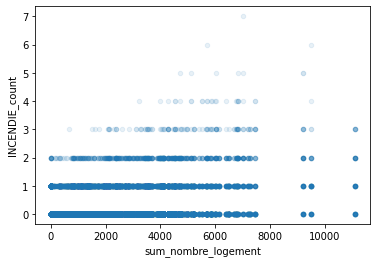

In [ ]:
df.plot(kind="scatter", x="sum_nombre_logement", y="INCENDIE_count",
             alpha=0.1)


In [ ]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

len(train_set),len(test_set)

(24664, 6167)

In [ ]:
train_set_n = train_set.drop("INCENDIE_count", axis=1)

In [ ]:
train_labels = train_set["INCENDIE_count"].copy()

In [ ]:
train_set_n.head()

,latitude,longitude,month,year,ALARMES_INCENDIES_count,total_crimes,vols_count,Mefait_count,Vol_de_vehicule_count,Introduction_count,Vol_moteur_count,Infractions_entrainant_count,caserne_count,sum_etage_hors_sol,sum_nombre_logement,min_annee_construction,max_annee_construction,avg_annee_construction,sum_superficie_terrain,sum_superficie_batiment,area,population,dwellings,households,averagehouseholdsize,averageage,averagesizeofcensusfamilies,workers
21898,45.61,-73.61,9,2020,3,1,0,0,0,1,0,0,0,1214,2009,1956,2018,1968.432056,385522,209298,0.05855,997,511,470,2.1,38.8,2.9,165
29462,45.59,-73.51,4,2019,0,7,1,0,1,2,3,0,0,1493,1944,1898,2019,1966.467925,297075,447529,0.27338,338,176,160,1.9,40.4,2.6,70
4990,45.49,-73.56,1,2020,8,2,0,0,0,1,1,0,1,4282,4774,1859,2019,2012.215104,287266,199041,0.25935,1469,1155,911,1.6,34.3,2.4,650
23698,45.44,-73.59,9,2017,2,3,0,0,0,3,0,0,0,899,782,1900,2008,1951.588825,313912,72231,0.14873,872,286,279,2.4,49.8,2.9,225
10709,45.64,-73.52,10,2018,0,2,0,0,0,1,1,0,0,12,0,1953,2012,1994.187500,92659,14570,4.07349,702,162,158,2.8,56.7,3.0,160


In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(train_set_n, train_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
lin_reg.coef_

array([ 9.11920252e-02, -7.83247002e-02, -2.12253370e-03,  6.13280404e-03,
        1.38795203e-02,  4.19131575e-03,  1.09189039e-02,  8.02533364e-03,
       -1.48180361e-02,  4.19386363e-03, -3.12655004e-03, -1.00219935e-03,
        1.94941440e-02, -1.83380367e-05,  7.64876886e-05,  3.38691387e-05,
        2.55926206e-04, -6.26221940e-04, -4.83659229e-08,  2.13956055e-10,
        1.21597201e-03,  7.38925269e-05,  8.22362787e-05, -1.40359087e-04,
       -2.05237945e-02, -2.46365713e-03,  4.14621428e-02, -2.17692127e-04])

In [ ]:
print(lin_reg.score(train_set_n,train_labels))

0.1342127525222565


In [ ]:
test_set_n = test_set.drop("INCENDIE_count", axis=1)
test_labels= test_set["INCENDIE_count"].copy()
print(lin_reg.score(test_set_n,test_labels))

0.1285290041904229
